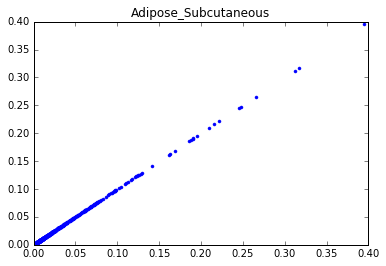

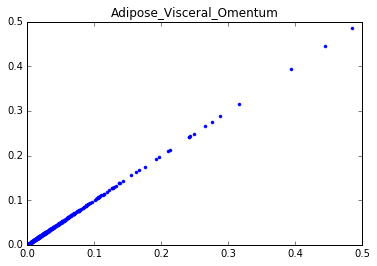

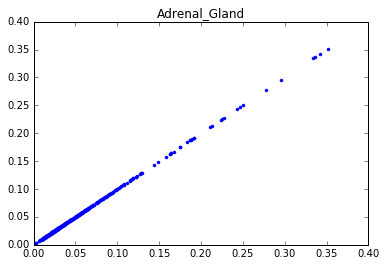

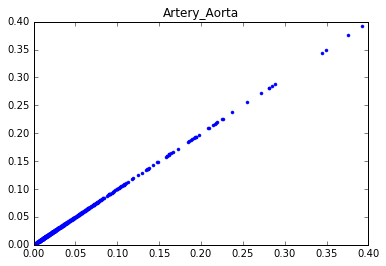

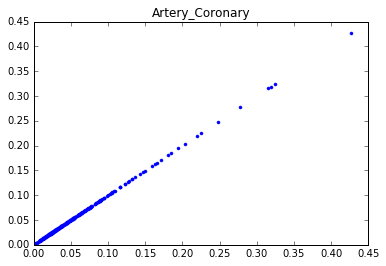

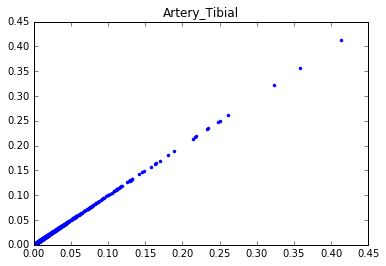

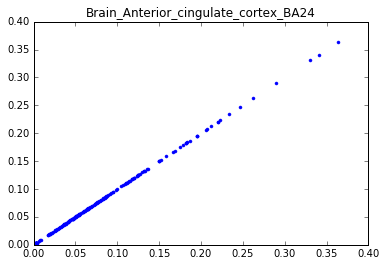

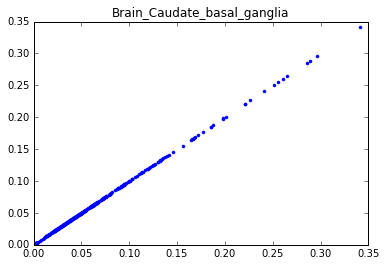

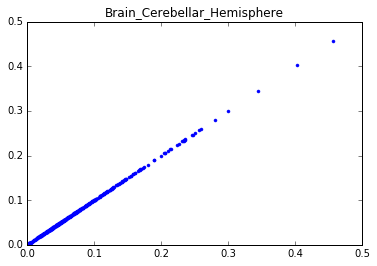

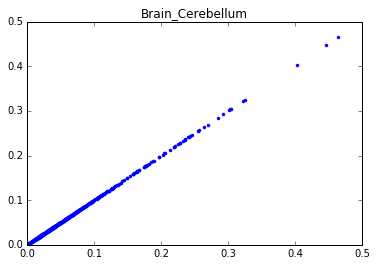

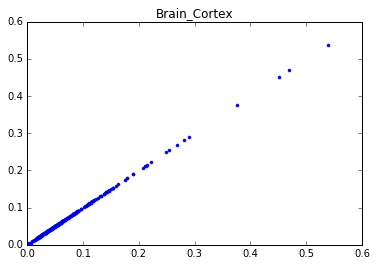

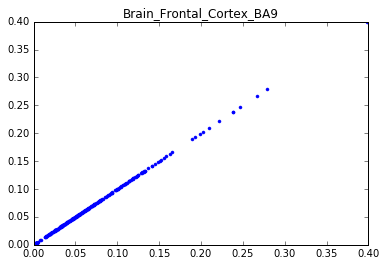

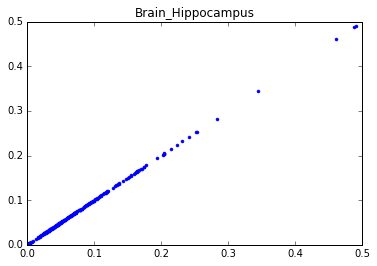

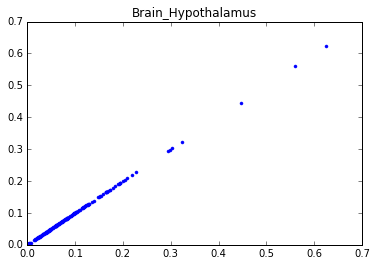

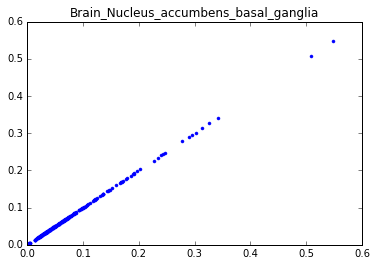

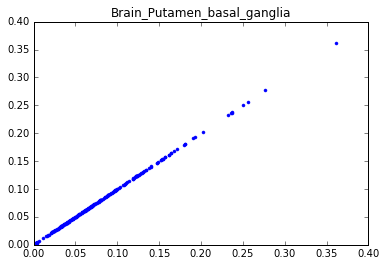

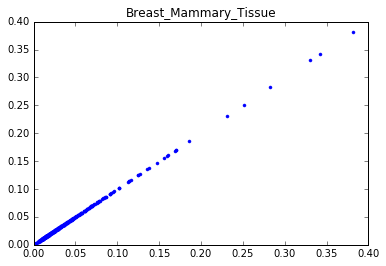

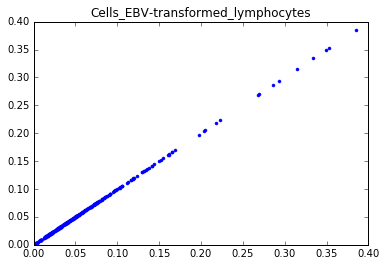

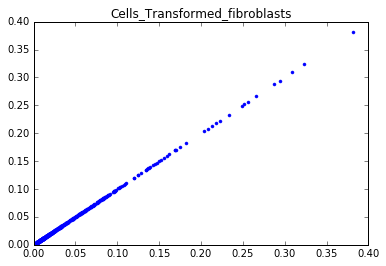

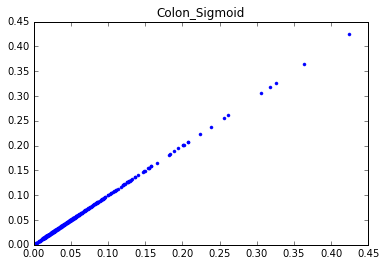

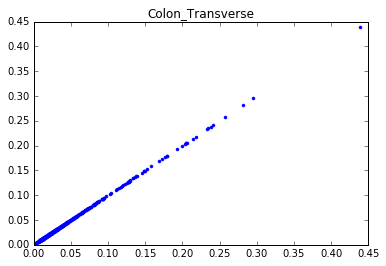

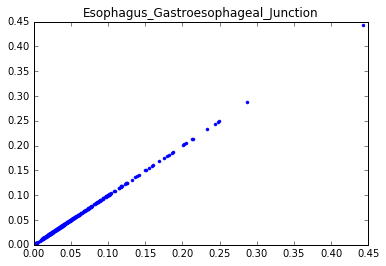

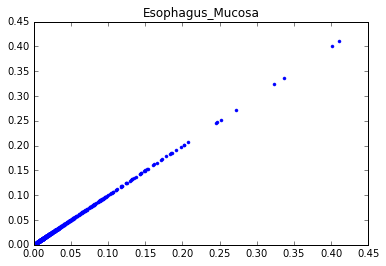

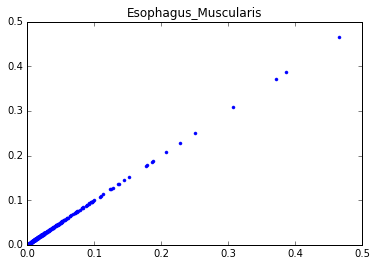

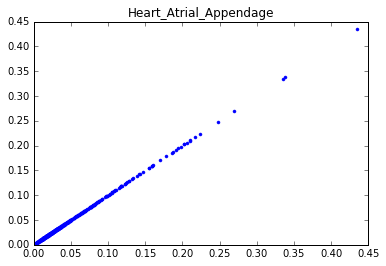

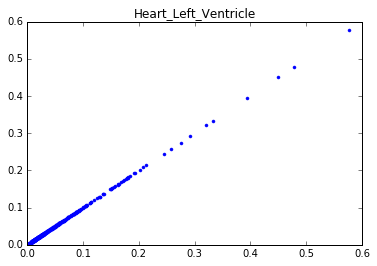

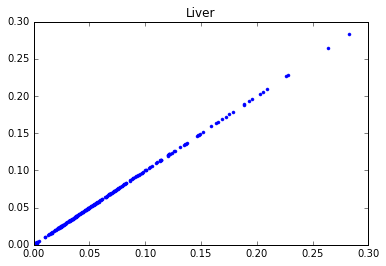

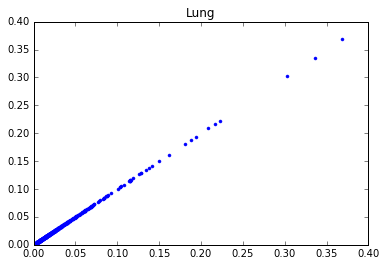

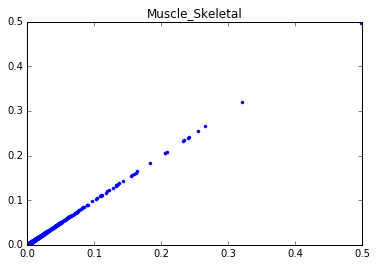

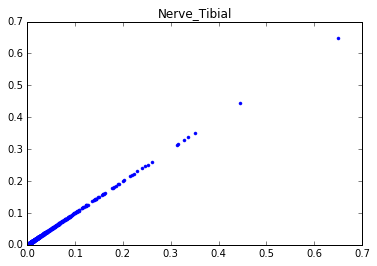

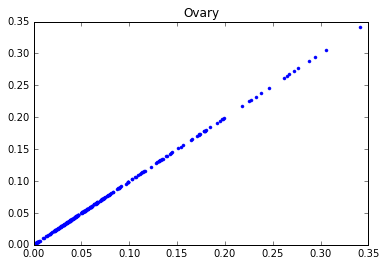

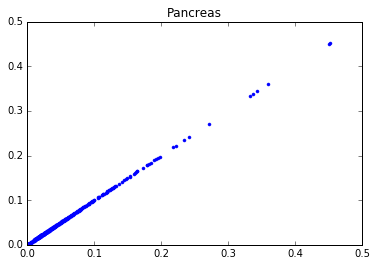

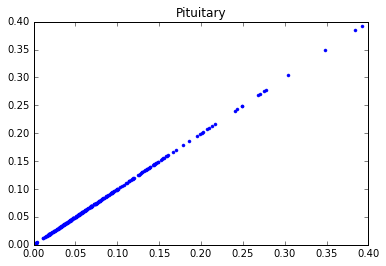

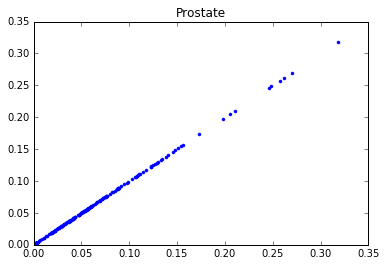

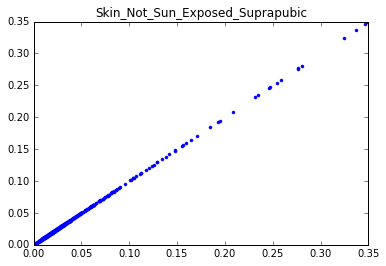

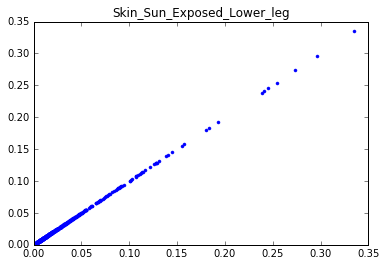

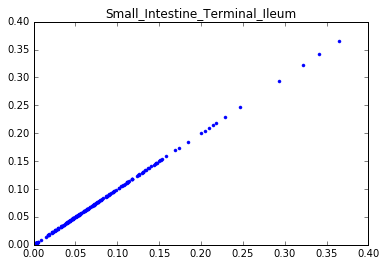

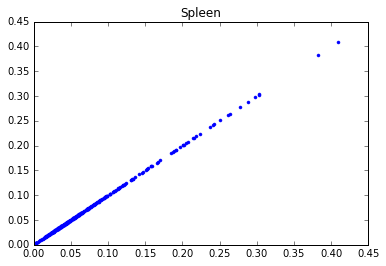

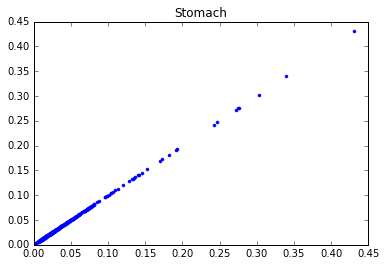

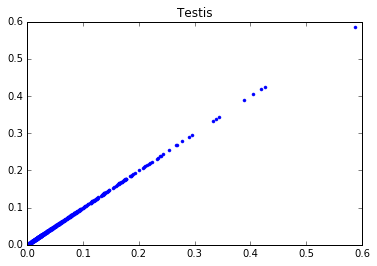

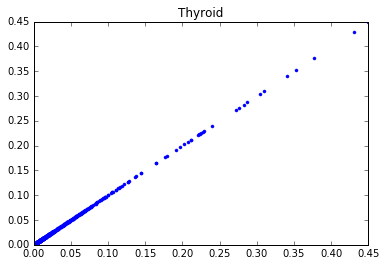

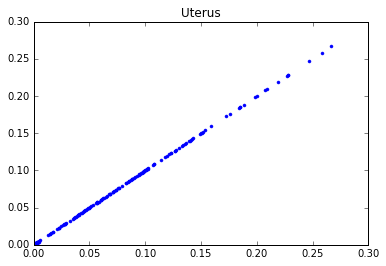

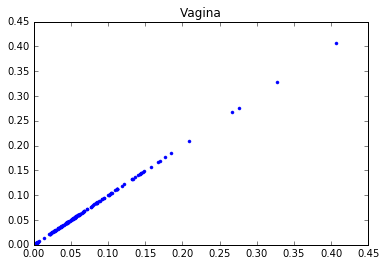

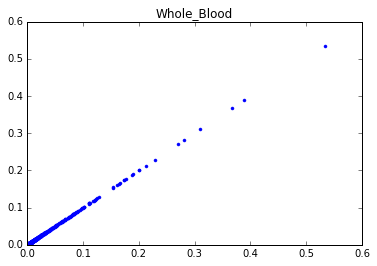

In [7]:
import os
import numpy as np
import pandas as pd
import sqlite3
import pickle
import matplotlib.pyplot as plt
% matplotlib inline

db_path = '../../data/predix_db/GTEx-V6p-HapMap-2016-09-08/'
fns = [f for f in os.listdir(db_path) if f[-3:] == '.db']
tissues = [f[3:-7] for f in fns]
save_path = '../processed_data/model_genes/var/'

for tissue in tissues:
    try:
        with open(os.path.join(save_path, '%s-gene2var.p' % tissue.replace('-', '_') ), 'rb') as reader:
            gene2var = pickle.load(reader)
    except:
        continue
        
    df_meta = pd.read_csv('~/projects/MetaXcan/software/result/lipid_genetics/HDL/TW_%s.csv' % tissue)
    
    gene02var = {g.split('.')[0]:v for g, v in gene2var.items()}
    var_check = [(g, v) for g, v, n0, n1 in zip(df_meta.gene, df_meta.VAR_g, df_meta.n_snps_used, df_meta.n_snps_in_cov) if n0 == n1]
    
    plt.plot([v[1] for v in var_check], [gene02var[g] for g, _ in var_check], '.')
    plt.title(tissue)
    plt.show()